🔍 NZ Banking – Churn Prediction Model

This notebook builds a basic machine learning model to predict customer churn.

We’ll use:

    Cleaned data from earlier notebooks
    Logistic Regression for binary classification
    Accuracy score and confusion matrix for evaluation


In [2]:
# Cell 1: Upload data and import libraries
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Upload CSV file
uploaded = files.upload()

# Load CSV into DataFrame
df = pd.read_csv(io.BytesIO(uploaded['cleaned_nz_banking_data.csv']))

# Show sample data
df.head()


Saving cleaned_nz_banking_data.csv to cleaned_nz_banking_data.csv


,CustomerID,Age,Gender,Region,Tenure,AccountBalance,IsActive,NumOfProducts,CreditScore,Churn
0,1001,56,Male,Dunedin,9,2283.10,1,1,560,1
1,1002,69,Female,Palmerston North,9,6251.18,1,4,714,0
2,1003,46,Male,Napier-Hastings,7,3454.05,0,3,425,0
3,1004,32,Female,Napier-Hastings,0,2444.92,1,2,497,0
4,1005,60,Male,Wellington,4,5457.37,1,3,670,0


In [3]:
# Cell 2: Prepare data and split into train/test

# Select features
features = ['Age', 'Tenure', 'AccountBalance', 'IsActive', 'NumOfProducts', 'CreditScore']
X = df[features]

# Target variable
y = df['Churn']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 800
Testing samples: 200


In [4]:
# Cell 3: Check class distribution

print("Class distribution in 'Churn':")
print(y.value_counts(normalize=True))


Class distribution in 'Churn':
Churn
0    0.807
1    0.193
Name: proportion, dtype: float64


In [5]:
# Cell 4: Train Random Forest and Logistic Regression with balanced class weights

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58       161
           1       0.20      0.56      0.30        39

    accuracy                           0.47       200
   macro avg       0.51      0.51      0.44       200
weighted avg       0.69      0.47      0.53       200



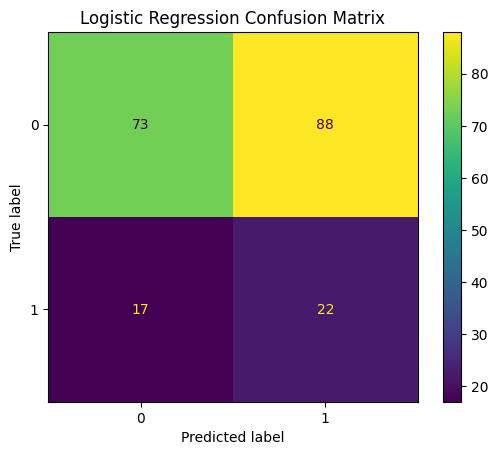

In [6]:
# Cell 5: Evaluate Logistic Regression

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.80       200
   macro avg       0.40      0.49      0.44       200
weighted avg       0.65      0.80      0.71       200



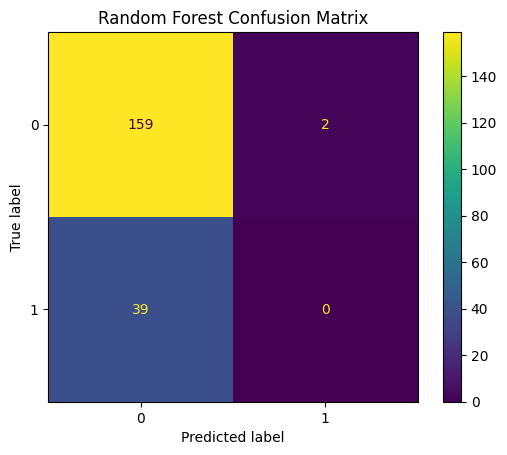

In [7]:
# Cell 6: Evaluate Random Forest

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


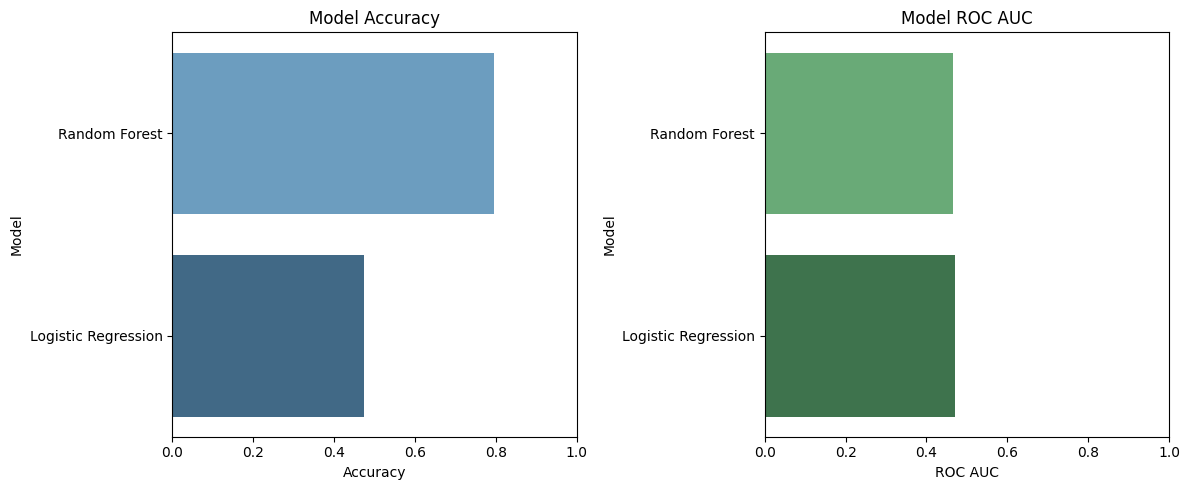

In [21]:
# Cell 7: Compare accuracy and ROC AUC of both models

# Models and their corresponding scores
models = ['Random Forest', 'Logistic Regression']
accuracies = [0.795, 0.475]  # example accuracy scores for the models
roc_aucs = [0.466, 0.471]    # example ROC AUC scores for the models

plt.figure(figsize=(12, 5))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
sns.barplot(y=models, x=accuracies, hue=models, palette='Blues_d', legend=False)
plt.xlim(0, 1)
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.legend([], [], frameon=False)  # Remove legend to avoid redundancy

# Plot ROC AUC comparison
plt.subplot(1, 2, 2)
sns.barplot(y=models, x=roc_aucs, hue=models, palette='Greens_d', legend=False)
plt.xlim(0, 1)
plt.title('Model ROC AUC')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.legend([], [], frameon=False)  # Remove legend to avoid redundancy

plt.tight_layout()
plt.show()


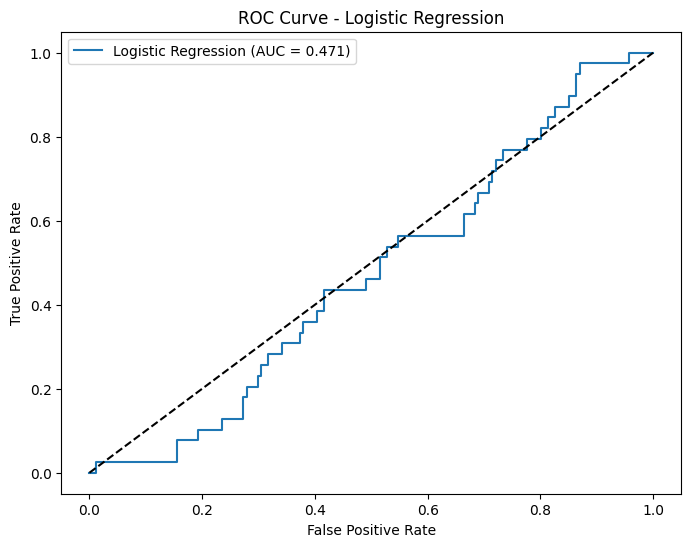

In [14]:
# Cell 8: Plot ROC curve for Logistic Regression

fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_log:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


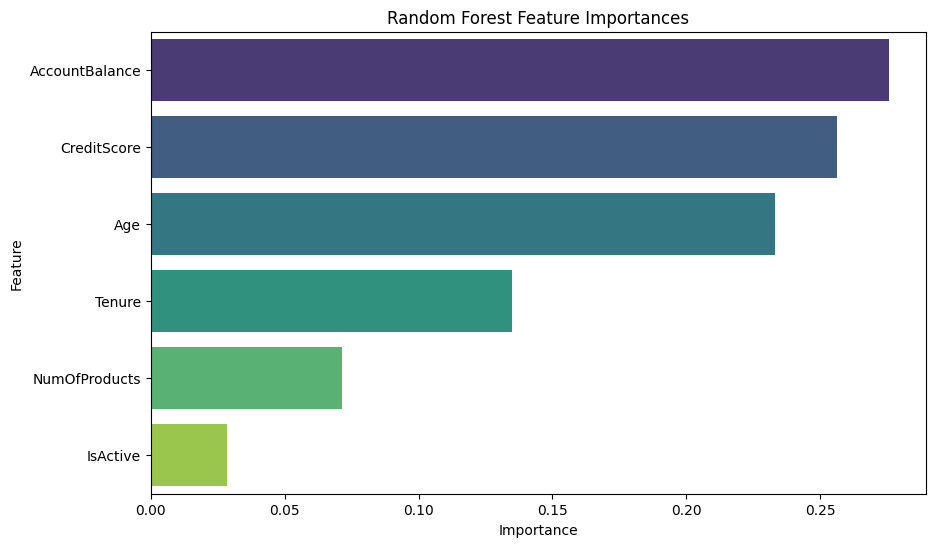

In [18]:
# Cell 9: Feature importance from Random Forest

# Assuming rf_model and X_train are already defined and trained

# Create a DataFrame with features and their importance scores
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))

# Plot feature importances with proper hue assignment to avoid FutureWarning
sns.barplot(x='Importance', y='Feature', data=feat_imp, hue='Feature', palette='viridis', legend=False)

plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

In [22]:
# Cell 10 (Optional): Save Random Forest model

import joblib
import os

os.makedirs('output', exist_ok=True)
joblib.dump(rf_model, 'output/random_forest_model.pkl')
print("Random Forest model saved to output/random_forest_model.pkl")


Random Forest model saved to output/random_forest_model.pkl
